# Assignment 2: 2-Pack

In [197]:
from framework import *
import math
import math
import numpy as np
import random

## Problem Description

The problem considers a set of $n$ rectangular boxes that are to be packed into a set of $m$ containers. Each box and each container has an $x$-length and a $y$-length. Furthermore each box as an associated weight $w$ that represents how important it is that the box is packed into a container. A box can either be packed vertically or horizontally into the container. The aim of the problem is to pack as many boxes into containers as possible such that the sum of the weights of packed boxes is maximised. Note that boxes cannot overlap and must stay within the boundaries of the containers. A solution to a problem with four containers and 100 boxes is visualised below.


![title](images/lab2.png)



## Data

A number of data files have been generated. Data files are in the following format

$n$

$x^{container}_1$ $y^{container}_1$ 

$x^{container}_2$ $y^{container}_2$ 

...

$x^{container}_n$ $y^{container}_n$

$m$

$x^{box}_1$ $y^{box}_1$ $w^{box}_1$ 

$x^{box}_2$ $y^{box}_2$ $w^{box}_2$

...

$x^{box}_m$ $y^{box}_m$ $w^{box}_m$


## Part 1: Corner Heuristic (50 marks)

## Corner Heuristic

An efficient heuristic for the 2d packing problem can be developed that is based on a couple of insights: (1) we may as well pack in corners and (2) corners are easy to track. To do so, for all empty containers we only consider the bottom-left corner as the initial corner. When we insert a box into that container we check whether the box can be placed (both horizontally and vertically) into that corner. A box can fit into a specific corner in a container in a specific direction if firstly the box fits inside the container, and secondly it does not overlap any other boxes that are already placed in the container. Once a box is inserted into a corner we can create two new corners - one at the top-left corner of the box, and one at the bottom-right corner of the box. In the image below, we see how the corners progress as boxes are inserted into a container. 


![title](images/corners.png)

If a box cannot fit into any of the corners from any of the containers then in the final solution it remains unpacked. Note that the order that both the boxes and containers are considered by the heuristic will most likely produce different solutions, as well as the order corners are considered by a box and whether the box first attempts to be inserted horizontally or vertically.

Part 1 of the assignment will consider implementing this heuristic. Template code is given but only to generate an initial solution. Please rewrite the functions (including function parameters!) as required.



**1a) Complete a function to check whether a box can be inserted into a specific corner of a container in a specific direction (i.e., either horizontally or vertically) (10 marks)** - Note a position is infeasible if any part of the box is outside the container or if the box overlaps with any other box that are already positioned in the container

In [198]:
def overlap_container(container, box1):
    """
    :param container:
    :param box1:
    :return:true: out of bound, false: inside of the box 
    """
    return not (box1[0] >= 0 and box1[1] >= 0 and box1[2] <= container.x_length and box1[3] <= container.y_length)

In [199]:
def overlap_box(box1 , box2):
    # test two overlapped or not
    """
    :param box1:
    :param box2:
    :return:true: overlap ; false: not overlap
    """
    x1down, y1down, x1up, y1up = box1[0], box1[1], box1[2], box1[3]
    x2down, y2down, x2up, y2up = box2[0], box2[1], box2[2], box2[3]
    return not (x1down >= x2up or x1up <= x2down or y1down >= y2up or y1up <= y2down)

In [200]:
def check_placement_feasibility(container, candidate_box, is_horizontal, corner): 
    
    box1 = box_positions(candidate_box, is_horizontal, corner)
    # test the box in container
    if overlap_container(container, box1):
        return False
    # if len(container.boxes) == 0:
    #     return True
    for eachbox in container.boxes:
        box2 = [eachbox.x_min, eachbox.y_min, eachbox.x_min + eachbox.x_delta,
                eachbox.y_min + eachbox.y_delta]
        if overlap_box(box2, box1):
            return False
    return True

In [201]:
def box_positions(box,is_horizontal,corner):
    """
    
    :param box: 
    :param is_horizontal: 
    :param corner: 
    :return: a list of 4 positions : left_bottom x, left_bottom_y, top_right x, top_right y 
    """
    return [corner.x,corner.y,corner.x+ (box.x_length if is_horizontal else box.y_length),corner.y+(box.y_length if is_horizontal else box.x_length)]

**1b) Write a function to update the corners of a container when a box is placed into a corner in a specific direction (10 marks)** - Note that the corner into which the box is being placed can be removed from the container and new corners are added at the top-left and bottom-right of the inserted box

In [202]:
def update_corners(container, box, is_horizontal, corner):
    box1 = box_positions(box, is_horizontal, corner)
    if check_placement_feasibility(container, box, is_horizontal, corner):
        container.corners.pop(container.corners.index(corner))  
        container.corners.append(Corner(x=box1[0], y=box1[3]))
        container.corners.append(Corner(x=box1[2], y=box1[1]))
        return True
    return False

**1c) Implement the corner heuristic (10 marks)** - Note that the heuristic should be able to generate different solutions depending on the input parameters, including  the order that the containers are considered, the order the boxes are considered, the direction preference of each box (i.e., does the heuristic try to first insert a box horizontally or vertically), and the corner preference of each box (i.e., what order does each box consider the corners of the containers). 

In [203]:
def corner_heuristic(containers, boxes, direction_preferences, corner_preferences):
    # TODO: implement the corner heuristic as described above. Please break up functions into smaller function as required.
    # This place holder function simply adds the first box to the fix corner
    
    unpacked_boxes = [box for box in boxes if box.packed == False]
    unpacked_containers = [contain for contain in containers if len(contain.boxes) == 0]
    for index, box in enumerate(unpacked_boxes):
        for container in unpacked_containers:
            if pack(container, box, corner_preferences, direction_preferences, index):
                # the box has been packed into a container, break the loop in containers
                break

    return SolutionState(containers, boxes, corner_preferences, direction_preferences)

In [204]:
def pack(container, box, corner_preferences, direction_preferences, index):
    # TODO: Update or delete this function as required
    """
    put one box to one container in a feasible position(try all directions and corners)
    :param container:
    :param box:
    :return:
    """
    
    for corindex, corner in (enumerate(container.corners) ):
        for direct in [direction_preferences[index], not direction_preferences[index]]:
            #direction_preferences[index] = direct
            if check_placement_feasibility(container,box,direction_preferences[index],corner) and not box.packed:
                # update the corner after append
                update_corners(container, box, direction_preferences[index], corner)  
                box.pack(container.id, corner.x, corner.y, direction_preferences[index])
                container.boxes.append(box)
                # update the corner and direction
                corner_preferences[index] = corindex
                direction_preferences[index] = direct

**1d) Demonstrate an execution of the corner heuristic on instance file_1_20.txt (10 marks)**. Here we will be checking that the corners are in the correct places and that the solution is feasible.
 1.  the corner heuristic function will iterate all boxes, and each box will select a valid container to put into. 
 2.  When choosing a valid container, the box will try every corner position and try prefered horizontality to fit into a box(if prefered horizontality not valid, try to rotate it). 
 3.  If box find a valid container( check_placement_feasibility returns True),   
    then we first update the corners in this container , update the box's information(the containers it belongs to, the left bottom coordinate,its horizontality),
    second, update the the corner_preferences and direction_preferences
 4. return a feasible solution
  

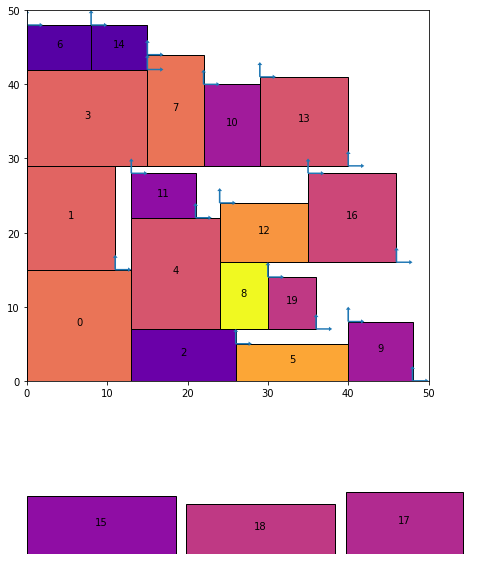

Solution objective is 172


In [205]:
data = Data("Data/file_1_20.txt")
solution = corner_heuristic(data.containers, 
                            data.boxes, 
                            [0 for box in data.boxes], 
                            [True for box in data.boxes])
solution.plot()
print("Solution objective is {}".format(solution.objective()))

### Incompleteness of the corner-heuristic

In general when building a meta-heuristic it is desirable to ensure that the heuristic being used to generate solutions is *complete*, i.e., for a given parameter setting the heuristic will generate the optimal solution. In the case where your meta-heuristic uses multiple heuristics, it is sufficient to ensure that only one of the heuristics is complete. The corner-heuristic is known to be incomplete. This means that for some problems, there does not exist a parameter setting to the heuristic that will generate an optimal solution.

**1e) Provide a minimal counter example that demonstrates that the corner heuristic is incomplete, i.e., an instance of a 2-D packing problem where no matter what parameters the heuristic is given it will never find the optimal solution. Briefly explain your answer (10 marks).**

WRITTEN RESPONSE HERE

Because we always pack the box on the top left and bottom right corners, as a result, it can lead to waste of space if there is free space on the left hand side or bottom side of the candidate box. For example, we can free up more space by moving the box 15 to the left and moving 14 dowm side, and we can move 16 box or 17 box into the container.


![title](images/Error.png)

## Part 2: Large Neighbourhood Search (50 marks)

Large Neighbourhood Search (LNS) is a single-solution based metaheuristic that aims to find high quality solutions to optimisation problems through iteratively destroying and repairing an incumbant solution. In the second part of this assignment we will build a LNS to the 2D packing problem that utilises the corner heuristic. Before the destroy and repair iterations of the Large Neighbourhood Search can begin, we must find an initial feasible solution to the problem. Below is a function that creates an initial feasible solution where no boxes are backed

In [206]:
def initial_feasible_solution(data):
	"""Takes the data and returns a feasible solution where no boxes are packed into any containers."""

	return SolutionState(containers=data.containers,
										   boxes=data.boxes,
										   corner_preferences=[0 for box in data.boxes],
										   direction_preferences=[True for index in range(len(data.boxes))])

### Destroy

Here we partially *destroy* a solution to our problem by completely unpacking a number of containers. In this way, the boxes in the packed containers remain *fixed* whereas the unpacked containers are *relaxed*. Clearly, the number of containers that we unpack (the *degree of destruction*) will impact how the search progresses.

**2a) Complete the following function to partially destroy a given solution by completely unpacking a number of containers (10 marks)**

In [207]:
def AreaLeft(container):
    # to calculate the left space for a container for sorting
    
    boxarea = sum([box.x_length*box.y_length for box in container.boxes])
    return container.x_length * container.y_length - boxarea

In [208]:
def containerNeedUnpack(containers, degree_of_destruction):
    """choose the boxes by remining space"""
    # decide how many containers to unpack
    degree = math.ceil(len(containers) * degree_of_destruction)
    # calculate the corresponding free space for containers and form a list
    remines = list(map(AreaLeft, containers))
    # form a list to store a pair of (free space,and container)
    rtn = list(zip(remines,containers))
    #sort the list by its remaining space in non-increasing order
    rtn.sort(key=(lambda item:item[0]),reverse=True)
    # only return the containers which need to be unpacked
    return [con[1] for con in rtn[0:degree]]

In [209]:
def destroy(incumbant_solution, degree_of_destruction=0.5):
    """Unpacks a certain number of containers"""
    # readyForUnpack stores the containers which are raedy for unpacking
    # only unpack the 
    readyForUnpack = containerNeedUnpack(incumbant_solution.containers, degree_of_destruction)
    for container in readyForUnpack:
        container.unpack()
    return incumbant_solution

### Repair

We repair a solution by using the corner-heuristic to try to reinsert the unpacked boxes. Recall that there are a number of parameters, i.e. box order, container order, corner preferences and direction preferences, that will impact how the corner heuristic will construct a solution. For example, the following parameter choices all seem reasonable

* Shuffle the boxes randomly, while keeping the remaining parameters the same as the incumbant solution
* Order the boxes by weight in a non-increasing order, while keeping the remaining parameters the same as the incumbant solution
* Order the boxes by weight / area in a non-increasing order, while keeping the remaining parameters the same as the incumbant solution
* Shuffle the container order randomly, wile keeping the remaining parameters the same as the incumbant solution
* Permute the direction preferences of some boxes, while keeping the remaining parameters the same as the incumbant solution
* Modify the corner preferences of some boxes, while keeping the remaining parameters the same as the incumbant solution


We do not want to constrain the heuristic to always use the same parameters choices and therefore wish for the solution to select parameters from a repair solution probabilistically.

**2b) Complete the following function to reconstruct a solution. Ensure that it is possible to exploit different parameters choices (at least 5) when using the corner heuristic. Briefly (in 5 lines or less) explain your approach (20 marks)**

WRITTEN RESPONSE HERE
I use the ALNS to unpack the containers which leaves most space among all containers. In repair, I have tried several methods to optimize the solutions, including ranking the boxes by weights( non-increasing order), by areas of boxes, and by density(weight/area). And also, I have tried to shuffle boxes randomly and randomly choose the prefered directions. I find that corner preferences does not work well, so I choose to try every corners in order in containers. Finally, I find that follow the steps 1.shuffle the boxes 2 rank the boxes by weight 3. give a random direction preference gaining a optimal solution. 

In [210]:
def nonIncreaseWeight(boxes, corner_preferences,direction_preferences):
    boxWeights = [box.weight for box in boxes]
    rtn = list(zip(boxWeights,boxes,corner_preferences,direction_preferences))
    rtn.sort(key=(lambda item:item[0]) , reverse=True)
    rtnboxes = [item[1] for item in rtn]
    rtncorners = [item[2] for item in rtn]
    rtndirection = [item[3] for item in rtn]
    return rtnboxes, rtncorners, rtndirection

In [211]:
def nonIncreaseArea(boxes, corner_preferences, direction_preferences):
    boxAreas = [box.x_length * box.y_length for box in boxes]
    rtn = list(zip(boxAreas, boxes, corner_preferences, direction_preferences))
    rtn.sort(key=lambda item: item[0], reverse=True)
    rtnboxes = [item[1] for item in rtn]
    rtncorners = [item[2] for item in rtn]
    rtndirection = [item[3] for item in rtn]
    return rtnboxes, rtncorners, rtndirection

In [212]:
def nonIncreaseDensity(boxes, corner_preferences, direction_preferences):
    boxDensity = [box.weight / box.x_length * box.y_length for box in boxes]
    rtn = list(zip(boxDensity, boxes, corner_preferences, direction_preferences))
    rtn.sort(key=lambda item: item[0], reverse=True)
    rtnboxes = [item[1] for item in rtn]
    rtncorners = [item[2] for item in rtn]
    rtndirection = [item[3] for item in rtn]
    return rtnboxes, rtncorners, rtndirection

In [213]:
def shuffleBoxes(solution):
    # fixedsolution = deepcopy(solution)
    num = len(solution.boxes)
    rtn = list(zip(solution.boxes, solution.corner_preferences, solution.direction_preferences))
    random.shuffle(rtn)
    rtnboxes = [item[0] for item in rtn]
    rtncorners = [item[1] for item in rtn]
    rtndirection = [item[2] for item in rtn]
    return rtnboxes, rtncorners, rtndirection

In [214]:
def repair(solution):
    """Repair the solution using the corner-heuristic with different parameter settings. There are a range of possible
    parameter settings"""

    boxnum = len(solution.boxes)
    # random boxes
    solution.boxes, solution.corner_preferences, solution.direction_preferences = shuffleBoxes(solution)
    # boxes in non-increasing-weight order
    solution.boxes, solution.corner_preferences, solution.direction_preferences = nonIncreaseWeight(solution.boxes,
                                                                                                    solution.corner_preferences,
                                                                                                    solution.direction_preferences)
    #solution.boxes, solution.corner_preferences, solution.direction_preferences = nonIncreaseDensity(solution.boxes, solution.corner_preferences,solution.direction_preferences)
    # boxes in non-increasing-area order
    #solution.boxes,solution.corner_preferences,solution.direction_preferences = nonIncreaseArea(solution.boxes,solution.corner_preferences, solution.direction_preferences)
    # random.shuffle(solution.containers)
    # shuffle direction_preference
    solution.direction_preferences = [random.choice([True, False]) for i in range(boxnum)]
    # modify corner_preferences
    # solution.corner_preferences = [random.randint(0, boxnum) for i in range(boxnum)]
    return corner_heuristic(solution.containers,
                            solution.boxes,
                            solution.corner_preferences,
                            solution.direction_preferences)

In [215]:
def unchanged(list_of_objects):
	return list_of_objects

## Iterate

LNS works by iteratively destroying and repairing an incumbant solution. Applications of LNS often differ in how they update the incumbant solution. For example, the simplest version of LNS simply accepts any new solution that has an objective function that is at least as good as the current incumbant. This can be thought of as a hill-climbing method. More advanced methods, such as Simulated-Annealing, allow the possibly for the incumbant solution to be replaced by a solution with a worse objective. 

**2c) Implement a LNS that iteratively repairs and detroys a solution using your detroy and repair operators and accepts a new solution if the objective is at least as good as the incumbant solution (10 marks)**

Explanation: Here I simply used a hill-climbing acceptance criteria. My logic for doing so is that the neighbourhoods I am considering are quite large (i.e., the degree-of-destuction is 50% and I have a lot of variability in my repair operator), so I am not overly concerned about getting stuck in a local minimum.

In [216]:
def LNSSolver(data, number_iterations):
    incumbant_solution = initial_feasible_solution(data)
    currentsolution = deepcopy(incumbant_solution)
    for num in range(number_iterations):
        while(currentsolution.objective()<800):
            currentsolution = destroy(currentsolution, 0.5)
            currentsolution = repair(currentsolution)
            if (currentsolution.objective() > incumbant_solution.objective()):
                incumbant_solution = deepcopy(currentsolution)
                print("Total weight is %s now" % (incumbant_solution.objective()))
    return incumbant_solution

**2d) Evaluate your LNS solver on instance file_4_100.txt. (10 marks)** 

Hint: You should be aiming for a solution with an objective above 800

Total weight is 773 now
Total weight is 780 now
Total weight is 785 now
Total weight is 786 now
Total weight is 789 now
Total weight is 795 now
Total weight is 796 now
Total weight is 803 now


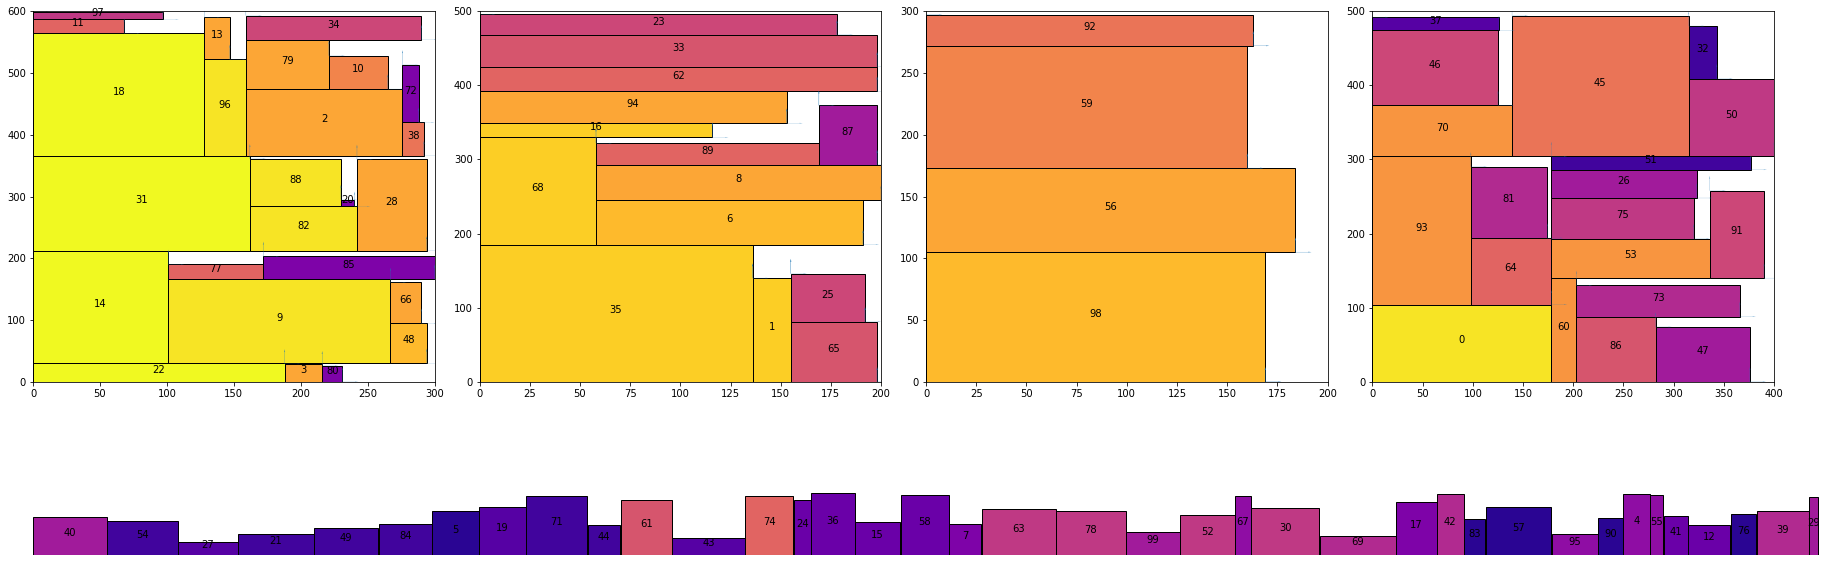

803

In [196]:
data = Data("Data/file_4_100.txt")
lns = LNSSolver(data, 1)
lns.plot()
lns.objective()

# **Additional Resources**

1. There is a python library 'alns' that helps build a variant of LNS known as Adaptive Large Neighbourhood Search. In the examples of this library it demonstrates how to solve the [travelling salesman problem (TSP)](https://github.com/N-Wouda/ALNS/blob/master/examples/travelling_salesman_problem.ipynb) and the [cutting stock problem (CSP)](https://github.com/N-Wouda/ALNS/blob/master/examples/cutting_stock_problem.ipynb). This is vary similar to what we are trying to achieve in this assigment
2. Some useful references:
  * Shaw P. (1998) Using Constraint Programming and Local Search Methods to Solve Vehicle Routing Problems. In: Maher M., Puget JF. (eds) Principles and Practice of Constraint Programming — CP98. CP 1998. Lecture Notes in Computer Science, vol 1520. Springer, Berlin, Heidelberg
  * Pisinger, D., and Ropke, S. (2010). Large Neighborhood Search. In M. Gendreau (Ed.), Handbook of Metaheuristics (2 ed., pp. 399-420). Springer.
  * Santini, A., Ropke, S. & Hvattum, L.M. (2018). A comparison of acceptance criteria for the adaptive large neighbourhood search metaheuristic. Journal of Heuristics 24 (5): 783-815.